1. import thu vien

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from scipy.interpolate import griddata

2. Code Content

[[136733.05001047   2618.03575167      0.        ]
 [  2618.03575167   9350.12768454      0.        ]
 [     0.              0.           5100.        ]]
ma tran mang, uon lech truc  [array([[136733.05001047,   2618.03575167,      0.        ],
       [  2618.03575167,   9350.12768454,      0.        ],
       [     0.        ,      0.        ,   5100.        ]]), array([[18612.02585508, 25201.86816261, 14540.42996385],
       [25201.86816261, 82303.48701805, 40617.99340743],
       [14540.42996385, 40617.99340743, 27683.83241094]]), array([[ 18612.02585508,  25201.86816261, -14540.42996385],
       [ 25201.86816261,  82303.48701805, -40617.99340743],
       [-14540.42996385, -40617.99340743,  27683.83241094]])]
ma tran cat lech truc  [array([[4250.,    0.],
       [   0., 1125.]]), array([[  734.375, -1171.875],
       [ 1171.875,  4640.625]]), array([[  734.375, -1171.875],
       [ 1171.875,  4640.625]])]
[[ 1.30467826e+06  3.97663291e+05  0.00000000e+00]
 [ 3.97663291e+05  1.3046782

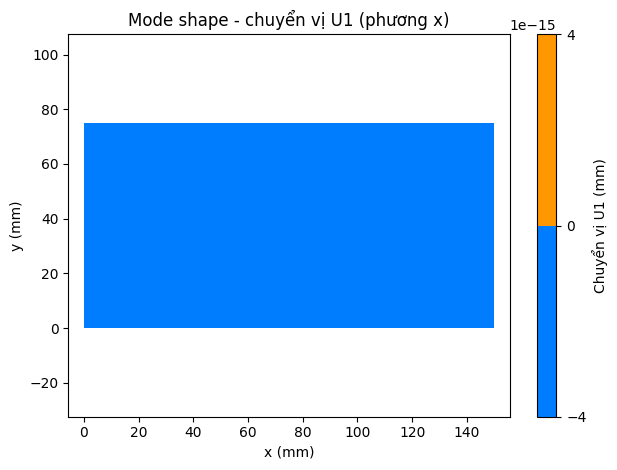

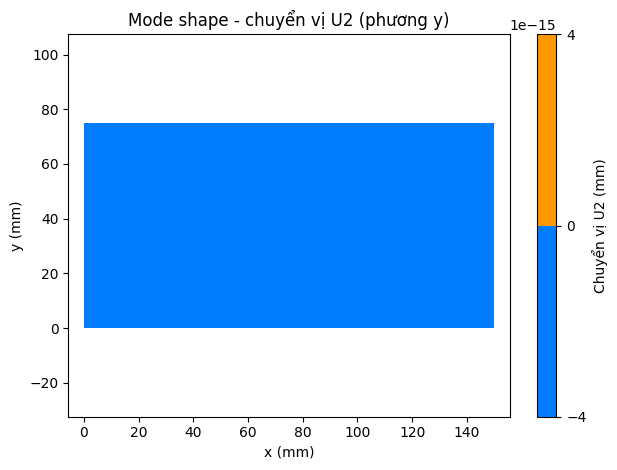

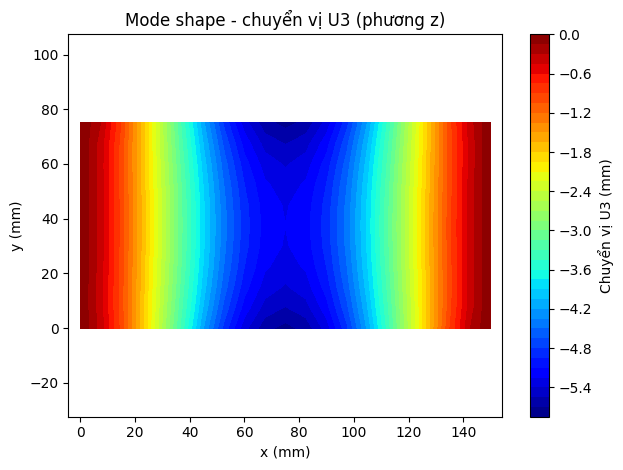

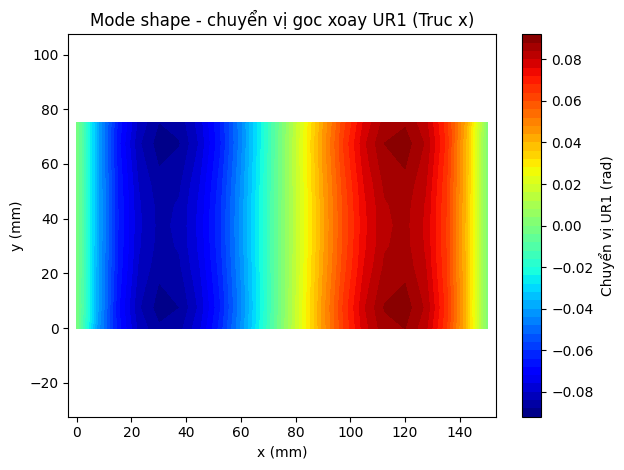

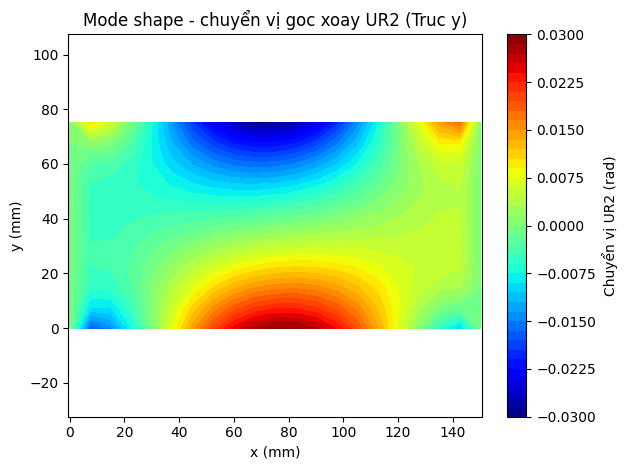

In [2]:
np.set_printoptions(threshold=np.inf) # Hien thi full np.array()
# Khai bao vat lieu
E1=136000
E2=9300
nu12=0.28
nu21=nu12*E2/E1
G12=5100
G13=5100
G23=1350
kapa=5/6
# Thong so hinh hoc cua tam
a=150
b=75
t=7.5
# Toa do cac lop Composite
t_i=np.array([-t/2,-t/2+t/3,t/2-t/3,t/2]) 
# So phan tu tren truc x,y cua tam
number_element_x=20
number_element_y=10
# So phan tu tam
number_element=number_element_x*number_element_y
number_node=(number_element_x+1)*(number_element_y+1)
# So bac tu do: u,v,w,phix,phiy
number_dof=5
# Toa do nut phan tu tren truc x,y
x_coordinate=np.linspace(0,a,number_element_x+1)
y_coordinate=np.linspace(0,b,number_element_y+1)
node_coordinate=np.zeros((number_node,2))

# Thiet lap ma tran toa do nut phan tu
for i in range(number_element_y+1):
    for j in range(number_element_x+1):
        node_coordinate[i*len(x_coordinate)+j,:]=[x_coordinate[j],y_coordinate[i]]

element_node_coords = []

for i in range(number_element_y):           # Lặp theo hàng (y)
    for j in range(number_element_x):       # Lặp theo cột (x)
        n1 = i * (number_element_x + 1) + j
        n2 = n1 + 1
        n3 = n1 + number_element_x + 2
        n4 = n1 + number_element_x + 1

        coords = np.array([
            node_coordinate[n1],
            node_coordinate[n2],
            node_coordinate[n3],
            node_coordinate[n4]
        ])
        element_node_coords.append(coords)

# Thiet lap ma tran do cung
Q11=E1/(1-nu12*nu21)
Q22=E2/(1-nu12*nu21)
Q12=(nu12*E2)/(1-nu12*nu21)
Q66=G12
Q44=G13
Q55=G23

Q=np.array([[Q11, Q12, 0]
   ,[Q12,Q22,0]
   ,[0, 0, Q66]])
print(Q)

Qs=np.array([[kapa*Q44, 0]
             ,[0, kapa*Q55]])

R=np.array([[1,0,0]
           ,[0,1,0]
           ,[0,0,2]])
# Ma tran chuyen he truc toa do
def MTG(theta):
    s=np.sin(theta)
    c=np.cos(theta)
    T=np.array([[c**2, s**2, 2*s*c]
               ,[s**2, c**2, -2*s*c]
               ,[-s*c, s*c, c**2-s**2]])
    return T
def MTGC(theta):
    s=np.sin(theta)
    c=np.cos(theta)
    Ts=np.array([[c**2, s**2]
               ,[s**2, c**2]])
    return Ts

# Ma tran do cung lech truc
Q_l=[]
Qs_l=[]
theta_l=[0, np.pi/3, -np.pi/3]
for i in theta_l:
    Q_li=np.linalg.inv(MTG(i))@ Q@ R@ (MTG(i)) @np.linalg.inv(R)
    Qs_li=np.linalg.inv(MTGC(i))@ Qs@ (MTGC(i))
    Q_l.append(Q_li)
    Qs_l.append(Qs_li)

print("ma tran mang, uon lech truc ", Q_l)
print("ma tran cat lech truc ", Qs_l)


# Xac dinh ma tran A,B,D
A=np.zeros((3,3))
B=np.zeros((3,3))
D=np.zeros((3,3))
D_s=np.zeros((2,2))
for j in range(len(theta_l)):
    for i in range(len(t_i)-1):
        A+=Q_l[j]*(t_i[i+1]-t_i[i])
        B+=Q_l[j]*(t_i[i+1]**2-t_i[i]**2)/2
        D+=Q_l[j]*(t_i[i+1]**3-t_i[i]**3)/3
        D_s+=Qs_l[j]*(t_i[i+1]-t_i[i])
print(A)
print(B)
print(D)
print(D_s)

# Ham dang cho cac diem toa do dia phuong xi, eta
def shape_fuction(xi,eta):
    N=np.array([(1-xi)*(1-eta)/4,(1+xi)*(1-eta)/4
                ,(1+xi)*(1+eta)/4,(1-xi)*(1+eta)/4])
    dN_dxi=np.array([[-(1-eta)/4,-(1-xi)/4]
                    ,[(1-eta)/4,-(1+xi)/4]
                    ,[(1+eta)/4,(1+xi)/4]
                    ,[-(1+eta)/4,(1-xi)/4]])
    return N,dN_dxi

xi,eta=0,0
Nc,dNc_dxi=shape_fuction(xi,eta)
print("Ham dang:",Nc)

# Ma tran chuyen toa do nut (Toa do phan tu --> Toa do tong the)
def Jacob(z):
    Jc=[]
    for j in z:
        J=np.zeros((2,2))
        for i in range(len(dNc_dxi[:,0])):
            J[0,0]+=dNc_dxi[i,0]*j[i,0]
            J[0,1]+=dNc_dxi[i,0]*j[i,1]
            J[1,0]+=dNc_dxi[i,1]*j[i,0]
            J[1,1]+=dNc_dxi[i,1]*j[i,1]
        Jc.append(J)
    return Jc
dN_dxy=[]
for i in Jacob(element_node_coords):
    hhh=np.linalg.inv(i)@dNc_dxi.T
    dN_dxy.append(hhh)

# Xay dung ma tran bien dang mang, uon va cat 
def build_Bm(dNdx, dNdy):
    Bm = np.zeros((3, 20))  # 4 nut x 5 bac tu do
    for i in range(4):
        Bm[0, i*5]   = dNdx[i]
        Bm[1, i*5+1] = dNdy[i]
        Bm[2, i*5]   = dNdy[i]
        Bm[2, i*5+1] = dNdx[i]
    return Bm

def build_Bb(dNdx, dNdy):
    Bb = np.zeros((3, 20))
    for i in range(4):
        Bb[0, i*5+3] = dNdx[i]
        Bb[1, i*5+4] = dNdy[i]
        Bb[2, i*5+3] = dNdy[i]
        Bb[2, i*5+4] = dNdx[i]
    return Bb

def build_Bs(dNdx, dNdy, N):
    Bs = np.zeros((2, 20))
    for i in range(4):
        Bs[0, i*5+2] = dNdx[i]
        Bs[0, i*5+3] = -N[i]
        Bs[1, i*5+2] = dNdy[i]
        Bs[1, i*5+4] = -N[i]
    return Bs


# Ma tran trong so tich phan gauss 2 diem cho phan tu 2D
def get_gauss_points_weights():
    # Gauss 2 diem moi chieu => 4 diem Gauss tong the
    gp = 1 / np.sqrt(3)
    # Toa do diem Gauss (xi,eta) va trong so weights
    gauss_points = [
        (-gp, -gp),
        ( gp, -gp),
        ( gp,  gp),
        (-gp,  gp)]
    weights = [1, 1, 1, 1]
    return gauss_points, weights

# Tổng số bậc tự do toàn hệ
total_dof = number_node * number_dof # 231 (so node) x 5 (So bac tu do) = 1155

# Khởi tạo ma trận độ cứng tổng thể 1155x1155
K_global = np.zeros((total_dof, total_dof))

# Lặp qua từng phần tử
for e_idx, coords in enumerate(element_node_coords):
    Ke = np.zeros((20, 20))  # 4 (node trong 1 phan tu) x 5 (So bậc tự do) = 20
    # Lấy tọa độ Gauss và trọng số
    gauss_pts, weights = get_gauss_points_weights()
    for gp_idx, (xi, eta) in enumerate(gauss_pts):
        N, dN_dxi = shape_fuction(xi, eta)
        # Tính Jacobian và đạo hàm theo x, y
        J = np.zeros((2, 2))
        for i in range(4):
            J[0, 0] += dN_dxi[i, 0] * coords[i, 0]
            J[0, 1] += dN_dxi[i, 0] * coords[i, 1]
            J[1, 0] += dN_dxi[i, 1] * coords[i, 0]
            J[1, 1] += dN_dxi[i, 1] * coords[i, 1]
        detJ = np.linalg.det(J)
        invJ = np.linalg.inv(J)
        dN_dxy = (invJ @ dN_dxi.T).T

        # Tính các ma trận Bm, Bb, Bs tại điểm Gauss
        Bm = build_Bm(dN_dxy[:, 0], dN_dxy[:, 1])
        Bb = build_Bb(dN_dxy[:, 0], dN_dxy[:, 1])
        Bs = build_Bs(dN_dxy[:, 0], dN_dxy[:, 1], N)

        # Tính ma trận độ cứng phần tử tại điểm Gauss và cộng dồn
        weight = weights[gp_idx]
        Ke += (Bm.T @ A @ Bm + Bb.T @ D @ Bb + Bm.T @ B @ Bb + Bb.T @ B.T @ Bm + Bs.T @ D_s @ Bs) * detJ * weight

    # Tìm chỉ số bậc tự do toỏng thể
    elem_nodes = [
        int(coords[0][1] / (b / number_element_y)) * (number_element_x + 1) + int(coords[0][0] / (a / number_element_x)),
        int(coords[1][1] / (b / number_element_y)) * (number_element_x + 1) + int(coords[1][0] / (a / number_element_x)),
        int(coords[2][1] / (b / number_element_y)) * (number_element_x + 1) + int(coords[2][0] / (a / number_element_x)),
        int(coords[3][1] / (b / number_element_y)) * (number_element_x + 1) + int(coords[3][0] / (a / number_element_x)),
    ]
    dof_map = []
    for n in elem_nodes:
        dof_map.extend([n*5, n*5+1, n*5+2, n*5+3, n*5+4])

    # Gán vào ma trận tổng thể
    for i in range(20):
        for j in range(20):
            K_global[dof_map[i], dof_map[j]] += Ke[i, j]

print("Kích thước ma trận độ cứng tổng thể:", K_global.shape)


prescribed_dof = []
for i, (x, y) in enumerate(node_coordinate):
    if np.isclose(x, 0) or np.isclose(x,a):
        for dof in range(5):  # 5 bậc tự do mỗi nút
            prescribed_dof.append(i * 5 + dof)

F = np.zeros(number_node * number_dof) # Vecto tải trọng 1155x1
# Gán tải trọng vào bậc tự do thứ 3 (w) tại các nút tự do
all_dof = np.arange(number_node * number_dof)
free_dof = np.setdiff1d(all_dof, prescribed_dof) # Xác định các nút tự do 
for i in range(free_dof[0],free_dof[-1],5):
    F[i+2]=-1000
#print(F)
# Giải hệ phương trình rút gọn
K_reduced = K_global[np.ix_(free_dof, free_dof)]
F_reduced = F[free_dof]

U_reduced = np.linalg.solve(K_reduced, F_reduced)

# Tạo vector chuyển vị đầy đủ
U = np.zeros(number_node * number_dof)
U[free_dof] = U_reduced

u=[]
v=[]
w=[]
phi_x=[]
phi_y=[]
for i in range(number_node):
    u.append(U[i*5])
    v.append(U[i*5+1])
    w.append(U[i*5+2])
    phi_x.append(U[i*5+3])
    phi_y.append(U[i*5+4])

print("Gia tri max chuyen vi u: ",np.max(u))
print("Gia tri min chuyen vi u: ",np.min(u))
print("Gia tri max chuyen vi v: ",np.max(v))
print("Gia tri min chuyen vi v: ",np.min(v))
print("Gia tri max chuyen vi w: ",np.max(w))
print("Gia tri min chuyen vi w: ",np.min(w))
print("Gia tri max chuyen vi phi_x: ",np.max(phi_x))
print("Gia tri min chuyen vi phi_x: ",np.min(phi_x))
print("Gia tri max chuyen vi phi_y: ",np.max(phi_y))
print("Gia tri min chuyen vi phi_y: ",np.min(phi_y))
print(w)
print(x_coordinate)
print('nut tu do:',free_dof)

# Code do thi mode shape cho chuyen vi w
grid_x,grid_y=np.meshgrid(x_coordinate,y_coordinate) # Tao luoi cac toa do node x,y
grid_u=griddata((node_coordinate[:,0],node_coordinate[:,1]),u,(grid_x,grid_y),method='cubic') # Tao luoi cac toa do node w
grid_v=griddata((node_coordinate[:,0],node_coordinate[:,1]),v,(grid_x,grid_y),method='cubic') # Tao luoi cac toa do node w
grid_w=griddata((node_coordinate[:,0],node_coordinate[:,1]),w,(grid_x,grid_y),method='cubic') # Tao luoi cac toa do node w
grid_phix=griddata((node_coordinate[:,0],node_coordinate[:,1]),phi_x,(grid_x,grid_y),method='cubic') # Tao luoi cac toa do node w
grid_phiy=griddata((node_coordinate[:,0],node_coordinate[:,1]),phi_y,(grid_x,grid_y),method='cubic') # Tao luoi cac toa do node w

# Mode shape Chuyen vi U
pl.figure('Mode shape - chuyển vị U1 (phương x)')
cp_u = pl.contourf(grid_x, grid_y, grid_u, levels=50, cmap='jet')
pl.colorbar(cp_u, label='Chuyển vị U1 (mm)')
pl.title('Mode shape - chuyển vị U1 (phương x)')
pl.xlabel('x (mm)')
pl.ylabel('y (mm)')
pl.axis('equal')
pl.tight_layout()
pl.show()

# Mode shape chuyen vi V
pl.figure('Mode shape - chuyển vị U2 (phương y)')
cp_v = pl.contourf(grid_x, grid_y, grid_v, levels=50, cmap='jet')
pl.colorbar(cp_v, label='Chuyển vị U2 (mm)')
pl.title('Mode shape - chuyển vị U2 (phương y)')
pl.xlabel('x (mm)')
pl.ylabel('y (mm)')
pl.axis('equal')
pl.tight_layout()
pl.show()

# Mode shape chuyen vi W
pl.figure('Mode shape - chuyển vị U3 (phương z)')
cp_w = pl.contourf(grid_x, grid_y, grid_w, levels=50, cmap='jet')
pl.colorbar(cp_w, label='Chuyển vị U3 (mm)')
pl.title('Mode shape - chuyển vị U3 (phương z)')
pl.xlabel('x (mm)')
pl.ylabel('y (mm)')
pl.axis('equal')
pl.tight_layout()
pl.show()

# Mode shape chuyen vi UR1
pl.figure('Mode shape - chuyển vị goc xoay UR1 (Truc x)')
cp_phix = pl.contourf(grid_x, grid_y, grid_phix, levels=50, cmap='jet')
pl.colorbar(cp_phix, label='Chuyển vị UR1 (rad)')
pl.title('Mode shape - chuyển vị goc xoay UR1 (Truc x)')
pl.xlabel('x (mm)')
pl.ylabel('y (mm)')
pl.axis('equal')
pl.tight_layout()
pl.show()

# Mode shape chuyen vi UR2
pl.figure('Mode shape - chuyển vị goc xoay UR2 (Truc y)')
cp_phiy = pl.contourf(grid_x, grid_y, grid_phiy, levels=50, cmap='jet')
pl.colorbar(cp_phiy, label='Chuyển vị UR2 (rad)')
pl.title('Mode shape - chuyển vị goc xoay UR2 (Truc y)')
pl.xlabel('x (mm)')
pl.ylabel('y (mm)')
pl.axis('equal')
pl.tight_layout()
pl.show()